CSV_PATH: C:\Users\spina\Documents\Other_Codes\7chackras\Documenti\ListaTicketVenduti_12Nov25.csv
OUTPUT_DIR: C:\Users\spina\Documents\Other_Codes\7chackras\Documenti\eda_outputs_ListaTicketVenduti_12Nov25
Shape iniziale: (201, 38)

Elenco colonne (ordine originale, n=38):
  1. Event Name
  2. First Name
  3. Last Name
  4. Name
  5. Attendee E-mail
  6. Payment Date
  7. Order Number
  8. Payment Gateway
  9. Order Status
 10. Order Total
 11. Order Total (Shown Once)
 12. Ticket Subtotal
 13. Ticket Discount
 14. Ticket Fee
 15. Ticket Tax
 16. Ticket Total
 17. Discount Code
 18. Ticket Code
 19. Ticket Download Url
 20. Ticket ID
 21. Ticket Type
 22. Buyer First Name
 23. Buyer Last Name
 24. Buyer Name
 25. Buyer E-Mail
 26. Checked-in
 27. Check-ins
 28. Check-outs
 29. API Key
 30. Price
 31. Order Notes
 32. Country of residence / Paese di residenza (Campi ticket holder)
 33. Phone number / Numero di telefono (Campi ticket holder)
 34. City of residence / Città di residenza (C

,tickets,revenue,avg_price
Ticket Type,,,
2026 – FULL FESTIVAL – EARLY BIRD FELLOW TICKET: 130€,88,11310.0,128.522727
2026 – FULL FESTIVAL – PHASE 0: 140€,73,9940.0,136.164384
2026 – FULL FESTIVAL – PHASE 1: 160€,40,6400.0,160.000000


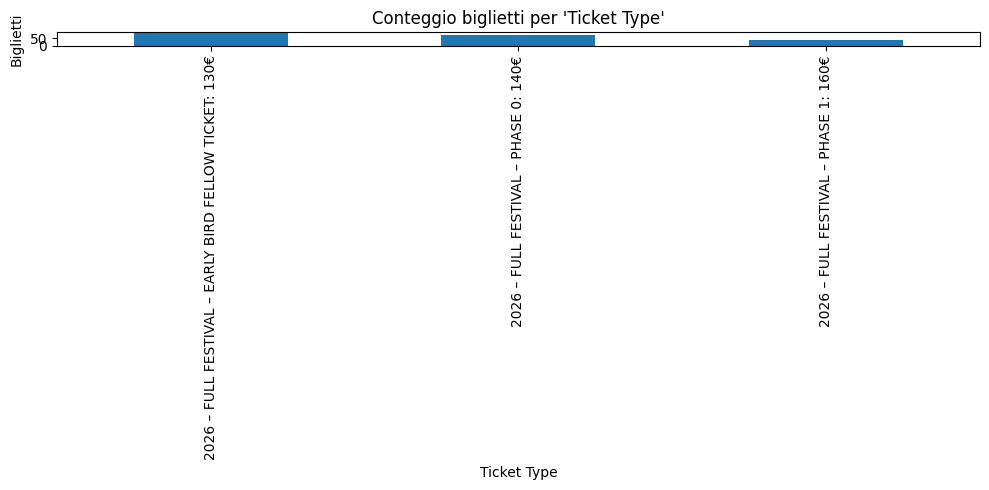

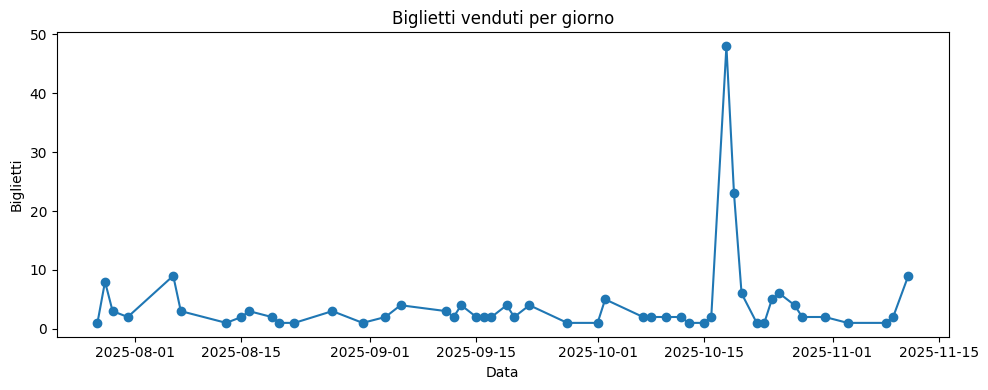

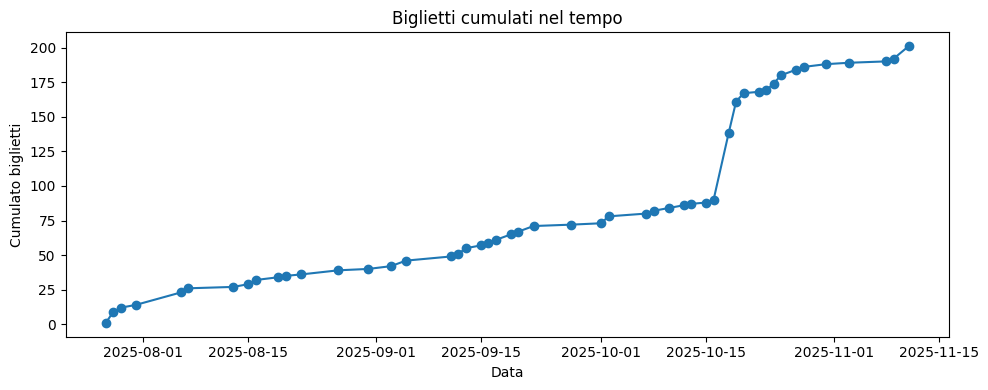

Top paesi:
 Country of residence / Paese di residenza (Campi ticket holder)
NaN               92
Italy             57
United Kingdom    12
Germany           12
Austria           10
United States      4
Netherlands        2
Finland            2
Peru               2
Japan              1
Israel             1
India              1
Bahamas            1
Belgium            1
Spain              1
Sweden             1
Switzerland        1
dtype: int64


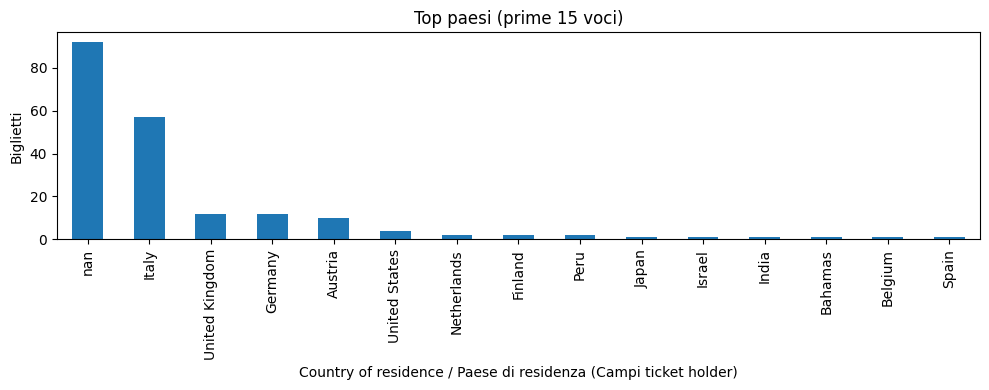

Top città:
 City of residence / Città di residenza (Campi ticket holder)
Innsbruck     6
Köln          6
Tolentino     6
Eindhoven     5
Fermignano    4
Leeds         4
Achern        4
Long Beach    4
London        4
Londra        4
Milano        4
Berlin        3
NaN           3
Messina       3
Roma          3
berlin        3
Padova        3
Gosport       2
Firenze       2
Groningen     2
dtype: int64


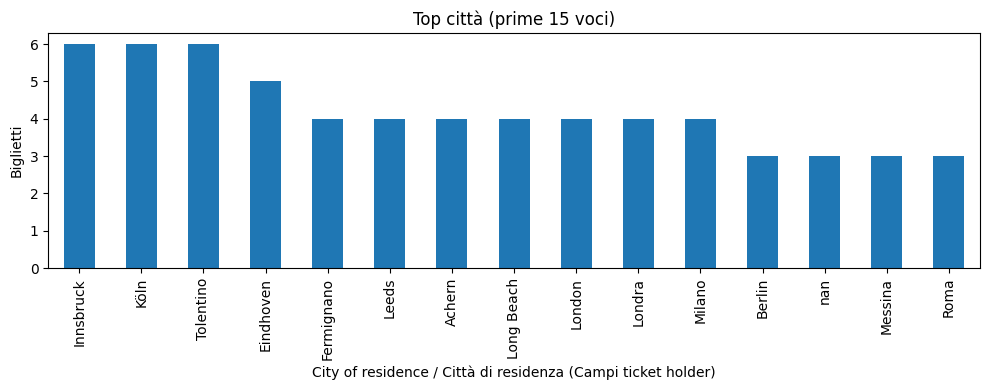

Righe con codice sconto: 7 (3.5%)

Frequenza per codice sconto:
 Discount Code
100ferrara    3
CHEERS        2
Earlybird     2
Name: count, dtype: int64


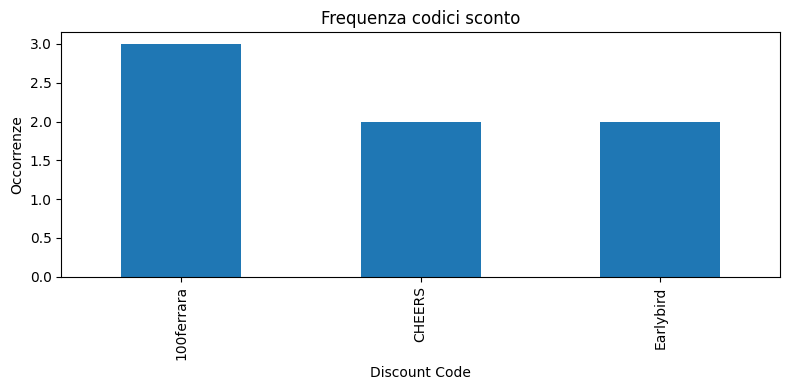


Sconto medio (solo righe con sconto): 57.86 €
Checked-in — esempi: ['No']
Check-ins — esempi: []
Check-outs — esempi: []

Stato 'Checked-in':
 Checked-in
no    201
Name: count, dtype: int64
Email (Attendee) con più di un record: 48


Attendee E-mail
jopjoel14@gmail.com                 4
giacomomazzoleni13@gmail.com        3
romin.parvardeh@gmail.com           3
kevin_cuadros@hotmail.it            3
kunova.alesandra.2001@gmail.com     3
maxim88fadeev@gmail.com             3
meom9@outlook.com                   3
michelamorico@gmail.com             2
simonnico@gmx.de                    2
carlosg2288@gmail.com               2
hollinson@hotmail.com               2
ana.vicsantander@gmail.com          2
claudio.mastromarino96@gmail.com    2
cristian.piccari@gmail.com          2
udupilamirissa@gmail.com            2
andrea.raneri94@gmail.com           2
dario.scaramucci@gmail.com8         2
g.cyrulies@web.de                   2
lintnernico@gmail.com               2
crazyyy4life@gmail.com              2
Name: count, dtype: int64


Ordini con più di una riga: 43


Order Number
06A29C0099    3
47E4E402F9    3
DABDC10D8D    3
3497329BC7    2
5E04E0B258    2
2E66DEBB08    2
2027383E30    2
7696ABD9A9    2
66981043F9    2
A8BE48EF81    2
2D04F35275    2
197D7619A4    2
9BAC988016    2
8116ADB996    2
BB45BDC5A1    2
32D5E93914    2
927B06A23E    2
2E7D9BEADF    2
D10D0C7891    2
A3091A04FC    2
Name: count, dtype: int64


% Valori mancanti su campi chiave:
 Attendee E-mail     0.0
Buyer E-Mail        0.0
Order Number        0.0
Ticket Type         0.0
Ticket Total_num    0.0
dtype: float64

Righe con Ticket Total zero ma ordine 'Paid': 2


,Order Number,Order Status,Ticket Total,Ticket Total_num,Discount Code
111,763048DB14,Paid,0,0.0,100ferrara
112,09A4159647,Paid,0,0.0,100ferrara


Esportato: C:\Users\spina\Documents\Other_Codes\7chackras\Documenti\eda_outputs_ListaTicketVenduti_12Nov25\by_type.csv
Esportato: C:\Users\spina\Documents\Other_Codes\7chackras\Documenti\eda_outputs_ListaTicketVenduti_12Nov25\by_country.csv

Fatto!


In [2]:
# %% [markdown]
# # 7 Chakras Festival 2026 — Exploratory Data Analysis (EDA)
#
# Questo notebook analizza il file esportato dei biglietti e costruisce alcune
# statistiche utili (vendite, entrate, paesi/città, tipi di ticket, sconti,
# duplicati, ecc.).
#
# **Percorso predefinito del dataset:**
# ```
# C:\Users\spina\Documents\Other_Codes\7chackras\Documenti\ticket2026.csv
# ```
# > Nota: I dati contengono informazioni personali. Usa e condividi con attenzione.

# %%
# === Setup ===================================================================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Visual options
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 160)

# Percorso del file CSV (modifica se necessario)
CSV_PATH = r"C:\Users\spina\Documents\Other_Codes\7chackras\Documenti\ListaTicketVenduti_12Nov25.csv"

# Cartella di output per file puliti / grafici
OUTPUT_DIR = os.path.join(os.path.dirname(CSV_PATH), "eda_outputs_ListaTicketVenduti_12Nov25")
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("CSV_PATH:", CSV_PATH)
print("OUTPUT_DIR:", OUTPUT_DIR)

# %% [markdown]
# ## 1) Caricamento dati + lista completa delle colonne (come nel CSV)
# In questa cella carichiamo il file e stampiamo **tutti i nomi colonna** esattamente come appaiono nell'esportazione.

# %%
# Lettura robusta del CSV (carica tutto come stringa per evitare conversioni premature)
read_kwargs = dict(
    sep=",",
    quotechar='"',
    encoding="utf-8",
    engine="python",
    dtype=str,
    skip_blank_lines=True
)

df_raw = pd.read_csv(CSV_PATH, **read_kwargs)
print("Shape iniziale:", df_raw.shape)

# Elenco completo delle colonne, prima di qualsiasi normalizzazione
raw_cols = list(df_raw.columns)
print("\nElenco colonne (ordine originale, n=%d):" % len(raw_cols))
for i, c in enumerate(raw_cols, 1):
    print(f"{i:>3}. {c}")

# Mini anteprima
df_raw.head(2)

# %% [markdown]
# ## 2) Pulizia colonne e normalizzazione tipi
# - Normalizziamo i nomi colonna (spazi, doppioni con suffisso `__1`, `__2`, …)
# - Convertiamo le date e i campi numerici

# %%
def normalize_col(c: str) -> str:
    c = (c or "").strip()
    c = " ".join(c.split())  # collassa spazi multipli
    return c

# Normalizza nomi e gestisci duplicati
norm_cols = [normalize_col(c) for c in df_raw.columns]
seen = {}
new_cols = []
for c in norm_cols:
    if c not in seen:
        seen[c] = 0
        new_cols.append(c)
    else:
        seen[c] += 1
        new_cols.append(f"{c}__{seen[c]}")  # es: "Phone number ...__1"

df = df_raw.copy()
df.columns = new_cols

print("Numero colonne dopo normalizzazione:", len(df.columns))
print("Esempio colonne:\n", df.columns[:25].tolist())

# Conversioni utili
def parse_payment_date(s):
    if pd.isna(s):
        return pd.NaT
    s = str(s).replace("–", "-").replace("—", "-").strip()
    for fmt in ["%d/%m/%Y - %H:%M", "%d/%m/%Y %H:%M", "%d/%m/%Y", "%d-%m-%Y %H:%M"]:
        try:
            return datetime.strptime(s, fmt)
        except ValueError:
            continue
    return pd.NaT

if "Payment Date" in df.columns:
    df["Payment_Date_parsed"] = df["Payment Date"].map(parse_payment_date)
else:
    df["Payment_Date_parsed"] = pd.NaT

def to_num(x):
    if x is None or (isinstance(x, float) and np.isnan(x)) or str(x).strip() in ("", "nan", "NaN", "None"):
        return np.nan
    s = str(x).strip().replace("€", "").replace(",", "").replace(" ", "")
    try:
        return float(s)
    except:
        s2 = str(x).strip().replace("€", "").replace(".", "").replace(",", ".").replace(" ", "")
        try:
            return float(s2)
        except:
            return np.nan

num_candidates = ["Order Total", "Ticket Subtotal", "Ticket Discount", "Ticket Fee", "Ticket Total", "Price"]
for c in num_candidates:
    if c in df.columns:
        df[c + "_num"] = df[c].map(to_num)

# Normalizza email (minuscolo/strip)
for c in ["Attendee E-mail", "Buyer E-Mail"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip().str.lower()

# Salva una copia pulita
clean_path = os.path.join(OUTPUT_DIR, "tickets_clean.csv")
df.to_csv(clean_path, index=False, encoding="utf-8")
print("Salvato:", clean_path)

# %% [markdown]
# ## 3) Panoramica rapida (campi chiave)

# %%
n_rows, n_cols = df.shape
print(f"Righe (record biglietti): {n_rows:,}")
print(f"Colonne: {n_cols:,}")

key_fields = [c for c in [
    "Event Name", "Order Number", "Order Status", "Payment Date", "Payment_Date_parsed",
    "Attendee E-mail", "Buyer E-Mail", "Ticket Type", "Ticket Code", "Ticket ID",
    "Ticket Total_num", "Order Total_num", "Price_num", "Discount Code",
    "Country of residence / Paese di residenza (Campi ticket holder)",
    "City of residence / Città di residenza (Campi ticket holder)"
] if c in df.columns]
print("\nCampi chiave trovati:\n", key_fields)

df[key_fields].head(10)

# %% [markdown]
# ## 4) Vendite & ricavi

# %%
tot_tickets = len(df)
tot_revenue_ticket = df.get("Ticket Total_num", pd.Series(dtype=float)).sum()
tot_revenue_order = df.get("Order Total_num", pd.Series(dtype=float)).sum()
avg_ticket_price = df.get("Ticket Total_num", pd.Series(dtype=float)).mean()

print(f"Totale biglietti: {tot_tickets:,}")
print(f"Somma Ticket Total (€): {tot_revenue_ticket:,.2f}")
print(f"Somma Order Total (€):  {tot_revenue_order:,.2f}")
print(f"Prezzo medio per riga (Ticket Total): {avg_ticket_price:,.2f} €")

# Vendite per tipo di ticket
if "Ticket Type" in df.columns:
    by_type = df.groupby("Ticket Type", dropna=False).agg(
        tickets=("Ticket Type", "size"),
        revenue=("Ticket Total_num", "sum"),
        avg_price=("Ticket Total_num", "mean")
    ).sort_values(["revenue", "tickets"], ascending=False)
    display(by_type.head(20))

# %%
# Grafico: ticket per tipo
if "Ticket Type" in df.columns:
    counts = by_type["tickets"]
    plt.figure(figsize=(10, 5))
    counts.plot(kind="bar")
    plt.title("Conteggio biglietti per 'Ticket Type'")
    plt.ylabel("Biglietti")
    plt.tight_layout()
    plt.show()

# %%
# Timeline vendite: biglietti per giorno (basata su Payment_Date_parsed)
ts = df.dropna(subset=["Payment_Date_parsed"]).copy()
if not ts.empty:
    ts["date"] = ts["Payment_Date_parsed"].dt.date
    daily = ts.groupby("date").size()

    plt.figure(figsize=(10, 4))
    daily.plot(kind="line", marker="o")
    plt.title("Biglietti venduti per giorno")
    plt.xlabel("Data")
    plt.ylabel("Biglietti")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    daily.cumsum().plot(kind="line", marker="o")
    plt.title("Biglietti cumulati nel tempo")
    plt.xlabel("Data")
    plt.ylabel("Cumulato biglietti")
    plt.tight_layout()
    plt.show()
else:
    print("Nessuna data di pagamento valida per costruire una timeline.")

# %% [markdown]
# ## 5) Provenienza geografica

# %%
country_col = "Country of residence / Paese di residenza (Campi ticket holder)"
city_col    = "City of residence / Città di residenza (Campi ticket holder)"

if country_col in df.columns:
    by_country = df.groupby(country_col, dropna=False).size().sort_values(ascending=False)
    print("Top paesi:\n", by_country.head(20))
    plt.figure(figsize=(10, 4))
    by_country.head(15).plot(kind="bar")
    plt.title("Top paesi (prime 15 voci)")
    plt.ylabel("Biglietti")
    plt.tight_layout()
    plt.show()

if city_col in df.columns:
    by_city = df.groupby(city_col, dropna=False).size().sort_values(ascending=False)
    print("Top città:\n", by_city.head(20))
    plt.figure(figsize=(10, 4))
    by_city.head(15).plot(kind="bar")
    plt.title("Top città (prime 15 voci)")
    plt.ylabel("Biglietti")
    plt.tight_layout()
    plt.show()

# %% [markdown]
# ## 6) Codici sconto & scontistica

# %%
if "Discount Code" in df.columns:
    has_disc = df["Discount Code"].fillna("").str.strip() != ""
    n_disc = has_disc.sum()
    print(f"Righe con codice sconto: {n_disc} ({n_disc/len(df)*100:.1f}%)")

    disc_counts = df.loc[has_disc, "Discount Code"].value_counts()
    print("\nFrequenza per codice sconto:\n", disc_counts)

    plt.figure(figsize=(8, 4))
    disc_counts.plot(kind="bar")
    plt.title("Frequenza codici sconto")
    plt.ylabel("Occorrenze")
    plt.tight_layout()
    plt.show()

    if "Ticket Discount_num" in df.columns:
        avg_disc = df.loc[has_disc, "Ticket Discount_num"].mean()
        print(f"\nSconto medio (solo righe con sconto): {avg_disc:.2f} €")
else:
    print("Colonna 'Discount Code' non presente.")

# %% [markdown]
# ## 7) Check-in (se disponibili)

# %%
for c in ["Checked-in", "Check-ins", "Check-outs"]:
    if c in df.columns:
        print(c, "— esempi:", df[c].dropna().unique()[:10])

if "Checked-in" in df.columns:
    checked = df["Checked-in"].astype(str).str.strip().str.lower()
    counts = checked.value_counts(dropna=False)
    print("\nStato 'Checked-in':\n", counts)

# %% [markdown]
# ## 8) Duplicati & qualità dati

# %%
# Potenziali duplicati per email partecipante
if "Attendee E-mail" in df.columns:
    vc = df["Attendee E-mail"].value_counts()
    dup_att = vc[vc > 1]
    print("Email (Attendee) con più di un record:", len(dup_att))
    display(dup_att.head(20))

# Potenziali duplicati per Order Number
if "Order Number" in df.columns:
    vc_ord = df["Order Number"].value_counts()
    multi_in_order = vc_ord[vc_ord > 1]
    print("\nOrdini con più di una riga:", len(multi_in_order))
    display(multi_in_order.head(20))

# Campi mancanti su colonne chiave
key_miss_cols = [c for c in ["Attendee E-mail","Buyer E-Mail","Order Number","Ticket Type","Ticket Total_num"] if c in df.columns]
if key_miss_cols:
    missing_summary = df[key_miss_cols].isna().mean().sort_values(ascending=False)
    print("\n% Valori mancanti su campi chiave:\n", (missing_summary*100).round(1))

# Righe sospette (prezzo zero ma stato 'Paid', ecc.)
sus = df[(df.get("Ticket Total_num", pd.Series(dtype=float)).fillna(0) == 0) &
         (df.get("Order Status", pd.Series(dtype=str)).astype(str).str.lower() == "paid")]
print(f"\nRighe con Ticket Total zero ma ordine 'Paid': {len(sus)}")
if len(sus) > 0:
    display(sus[["Order Number","Order Status","Ticket Total","Ticket Total_num","Discount Code"]].head(10))

# %% [markdown]
# ## 9) Esportazioni riassuntive

# %%
# Salva alcune tabelle utili
exports = {}

if "Ticket Type" in df.columns:
    exports["by_type.csv"] = df.groupby("Ticket Type", dropna=False).agg(
        tickets=("Ticket Type","size"),
        revenue=("Ticket Total_num","sum"),
        avg_price=("Ticket Total_num","mean")
    ).sort_values(["revenue","tickets"], ascending=False)

country_col = "Country of residence / Paese di residenza (Campi ticket holder)"
if country_col in df.columns:
    exports["by_country.csv"] = df.groupby(country_col, dropna=False) \
                                  .size().to_frame("tickets") \
                                  .sort_values("tickets", ascending=False)

for name, tab in exports.items():
    outp = os.path.join(OUTPUT_DIR, name)
    tab.to_csv(outp, encoding="utf-8")
    print("Esportato:", outp)

print("\nFatto!")


In [2]:
# === Estrai [Nome, Email, DataAcquisto] da ticket2026.csv =====================
import os
import pandas as pd
from datetime import datetime

CSV_PATH = r"C:\Users\spina\Documents\Other_Codes\7chackras\Documenti\ticket2026.csv"

# Lettura robusta: carica tutto come stringhe
df = pd.read_csv(
    CSV_PATH,
    sep=",",
    quotechar='"',
    encoding="utf-8",
    engine="python",
    dtype=str,
    skip_blank_lines=True
)

# Helper: parsing data "31/10/2025 - 07:57" -> ISO
def parse_payment_date(s: str):
    if s is None:
        return None
    s = str(s).replace("–", "-").replace("—", "-").strip()
    for fmt in ("%d/%m/%Y - %H:%M", "%d/%m/%Y %H:%M", "%d/%m/%Y", "%d-%m-%Y %H:%M"):
        try:
            return datetime.strptime(s, fmt)
        except ValueError:
            pass
    return None

# Normalizza stringa sicura
def clean(s):
    return "" if s is None else str(s).strip()

# In molti export l'ordine colonne include:
# - "Last Name" (attendee cognome)
# - "Attendee E-mail"
# - "Payment Date"
# - "Buyer First Name", "Buyer Last Name", "Buyer E-Mail"
# Qui preferiamo i dati attendee; se mancano, fallback al buyer.
att_last_col   = "Last Name"
att_email_col  = "Attendee E-mail"
pay_date_col   = "Payment Date"
buy_first_col  = "Buyer First Name"
buy_last_col   = "Buyer Last Name"
buy_email_col  = "Buyer E-Mail"

rows = []
for _, r in df.iterrows():
    # Nome: se abbiamo nome+cognome buyer usiamoli,
    # altrimenti proviamo solo cognome attendee; come ultima risorsa l'email.
    buyer_first = clean(r.get(buy_first_col))
    buyer_last  = clean(r.get(buy_last_col))
    attendee_last = clean(r.get(att_last_col))

    if buyer_first or buyer_last:
        name = (buyer_first + " " + buyer_last).strip()
    elif attendee_last:
        name = attendee_last
    else:
        name = ""  # useremo l'email se esiste

    # Email: preferisci attendee, poi buyer
    email = clean(r.get(att_email_col)) or clean(r.get(buy_email_col))

    # Data acquisto: originale + ISO (se parsabile)
    raw_date = clean(r.get(pay_date_col))
    dt = parse_payment_date(raw_date)
    iso = dt.isoformat(timespec="minutes") if dt else raw_date  # se non parsabile, tieni raw

    # Se il nome è vuoto ma abbiamo email, metti l'email come “nome” di fallback
    if not name and email:
        name = email

    rows.append({
        "Nome": name,
        "Email": email.lower(),
        "DataAcquisto": iso
    })

out = pd.DataFrame(rows)

# Rimuovi righe senza email (opzionale ma utile)
out = out[out["Email"].str.len() > 0].reset_index(drop=True)

# Salva vicino al CSV
out_path = os.path.join(os.path.dirname(CSV_PATH), "ticket_contacts.csv")
out.to_csv(out_path, index=False, encoding="utf-8")
print(f"Creato file: {out_path}")
print(out.head(10))


Creato file: C:\Users\spina\Documents\Other_Codes\7chackras\Documenti\ticket_contacts.csv
               Nome                        Email      DataAcquisto
0    Päivi Prokkola    matti.rasanen93@gmail.com  2025-10-31T07:57
1    Päivi Prokkola           prokkola@gmail.com  2025-10-31T07:57
2   Silvia Ruggieri  silviaruggieri178@gmail.com  2025-10-28T18:44
3  Cristian Piccari   cristian.piccari@gmail.com  2025-10-27T19:47
4   Bernd Koberwein            beppino@gmail.com  2025-10-25T20:03
5   Bernd Koberwein          koberwein@gmail.com  2025-10-25T20:03
6     Carlos Guzman           lisapaer@gmail.com  2025-10-25T00:13
7     Carlos Guzman        carlosg2288@gmail.com  2025-10-25T00:13
8     Felix Weigand         cordula.r@hotmail.de  2025-10-24T17:02
9     Felix Weigand       felix.weigand@yahoo.de  2025-10-24T17:02
